In [ ]:
pip install kneed

In [ ]:
pip install scikit-learn-extra

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn_extra.cluster import KMedoids
from kneed import KneeLocator
from sklearn import metrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import Normalizer

In [3]:
dfDados = pd.read_csv("DadosCompletos.csv", index_col=0)
#print(dfDados)
dfCluster=dfDados.copy()
dfCluster=dfCluster.set_index("Município")
dfCluster.drop(["CodMuns","Estado","Tipo_Urb"],axis=1,inplace=True)
#print(dfCluster)

In [ ]:
#Padronização dos dados
#scaler = StandardScaler()
#dfCluster_scaled = scaler.fit_transform(dfCluster)
#dfCluster.drop(["Média Cob Vac","Média Var CobVac","Média Var At Pr","Média Var Plano","IDHm_renda","pop_area","Média_pop","Média_pop0a4",
#                "area_km2","Densidade", "média_familias_bf"], axis=1, inplace=True)
#print(dfCluster)
#print(dfCluster_scaled)
#len(dfCluster_scaled)

In [4]:
#Normalização dos dados
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())


dfCluster.drop(["Média Cob Vac","Média Var CobVac","Média Var At Pr","Média Var Plano","IDHm_renda","pop_area","Média_pop","Média_pop0a4",
                "area_km2","Densidade", "média_familias_bf"], axis=1, inplace=True)

dfCluster_scaled = minmax_norm(dfCluster)
#print(dfCluster_scaled)

# K-means

In [ ]:
#Código da clusterização quando já se sabe a quantidade de clusters
kmeans = KMeans(init="k-means++", n_clusters=10, n_init=10, max_iter=300, random_state=42)
kmeans.fit(dfCluster_scaled)

#Mostra a localização dos centros das variáveis de cada cluster
kmeans.cluster_centers_
#Mostra o erro quadrático (sse)
kmeans.inertia_
#Mostra a quantidade de interações necessárias para convergir
kmeans.n_iter_
#Mostra aonde cada objeto está, em que cluster
kmeans.labels_

7


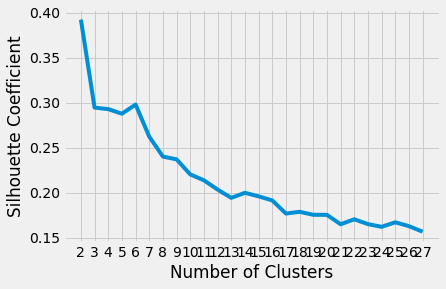

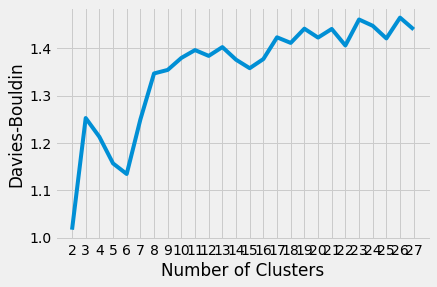

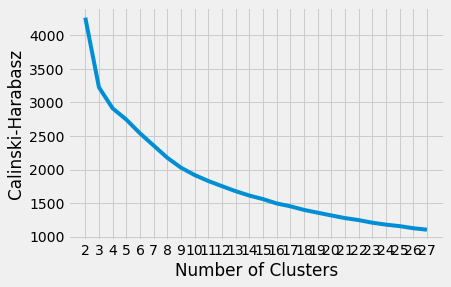

In [5]:
#Métricas de avaliação
#Método do cutuvelo, silhoutte, Davies-Bouldin e Calinski-Harabasz

kmeans_par = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state":8}

sse = []
coef_silhueta = []
DB =[]
CH=[]
for k in range(2, 28):
    kmeans = KMeans(n_clusters=k, **kmeans_par)
    kmeans.fit(dfCluster_scaled)
    sse.append(kmeans.inertia_)
    score = silhouette_score(dfCluster_scaled, kmeans.labels_)
    coef_silhueta.append(score)
    DvB=davies_bouldin_score(dfCluster_scaled, kmeans.labels_)
    DB.append(DvB)
    ch=metrics.calinski_harabasz_score(dfCluster_scaled, kmeans.labels_)
    CH.append(ch)
    

    
kl = KneeLocator(range(2, 28), sse, curve="convex", direction="decreasing")
ponto = kl.elbow
print(ponto)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 28), coef_silhueta)
plt.xticks(range(2, 28))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

plt.style.use("fivethirtyeight")
plt.plot(range(2, 28), DB)
plt.xticks(range(2, 28))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin")
plt.show()

plt.style.use("fivethirtyeight")
plt.plot(range(2, 28), CH)
plt.xticks(range(2, 28))
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz")
plt.show()

In [ ]:
#Davies-Bouldin - quanto menor o valor do indice melhor, significa baixas medidas de dispersãoo intragrupo 
#e grandes distâncias intergrupos
#Um índice Davies-Bouldin mais baixo se refere a um modelo com melhor separação entre os clusters.
#

#Silhouette - quanto maior o valor do indice melhor

#Calinski-Harabasz
#O índice é a razão da soma da dispersão entre clusters e da dispersão dentro do cluster para todos os clusters 
#(onde a dispersão é definida como a soma das distâncias ao quadrado), também conhecido como Critério da Razão de Variância.
#Uuma pontuação mais alta se refere a um modelo com clusters mais bem definidos.


In [6]:
nCluster=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dicionário = {'SSE': sse,'Coef_Silhouette': coef_silhueta, "Davies-Bouldin":DB,"Calinski-Harabasz":CH, "N_Cluster":nCluster}
dfTab = pd.DataFrame(dicionário)
dfTab=dfTab.set_index("N_Cluster")
print(dfTab)


                  SSE  Coef_Silhouette  Davies-Bouldin  Calinski-Harabasz
N_Cluster                                                                
2          619.556292         0.392252        1.016571        4263.811300
3          502.944236         0.294502        1.252599        3226.218990
4          420.287187         0.292890        1.212872        2912.849165
5          361.878378         0.287725        1.156721        2745.672283
6          326.959228         0.297929        1.134329        2541.238328
7          302.393609         0.262272        1.249521        2359.372940
8          286.310332         0.240205        1.346864        2177.038200
9          272.969776         0.237036        1.354340        2029.228962
10         260.265611         0.220351        1.379705        1919.495746
11         248.783485         0.213809        1.396294        1830.828584
12         238.724838         0.203529        1.384020        1753.959927
13         230.643374         0.194275

In [7]:
kmeans = KMeans(init="k-means++", n_clusters=2, n_init=10, max_iter=300,random_state=8)
kmeans.fit(dfCluster_scaled)
clas=kmeans.labels_

In [8]:
dfMunCl=dfDados
dfMunCl["k-classes"]= clas
#dfMunCl = dfMunCl.set_index("Região")
#print(dfMunCl)

dfKmeans=dfDados
dfKmeans=dfKmeans.set_index("CodMuns")
dfKmeans.drop(["Estado","Tipo_Urb","Média Cob Vac","Média Var CobVac","Média Var At Pr","Média Var Plano","IDHm_renda","pop_area","Média_pop","Média_pop0a4",
                "area_km2","Densidade", "média_familias_bf"], axis=1, inplace=True)
dfKmeans.rename(columns = {"Média_pct_pop0a4":'População0a4',"gini":"Gini", "pct_san_adeq":"Saneamento Básico", "média_pct_ben_bf":"Ben Bolsa Família"}, inplace = True)
dfKmeans["k-classes"]= clas
print(dfKmeans)

NomeExcel = pd.ExcelWriter('DadosKmeans.xlsx')
dfKmeans.to_excel(NomeExcel)
NomeExcel.save()

dfKmeans.to_csv("DadosKmeans.csv")


#Criando base de dados para o mapa do QGIS
dfKmeansmapa= dfKmeans.copy()
dfKmeansmapa.drop(["Média At Pr","Média Plano", "IDHm", "Gini","População0a4","Saneamento Básico","Ben Bolsa Família"], axis=1, inplace=True)
dfKmeansmapa=dfKmeansmapa.set_index("Município")
print(dfKmeansmapa)
NomeExcel = pd.ExcelWriter('ClusterMapa.xlsx')
dfKmeansmapa.to_excel(NomeExcel)
NomeExcel.save()

               Município  Média At Pr  Média Plano   IDHm    Gini  \
CodMuns                                                             
530010          Brasília    57.119091    29.526256  0.824  0.6370   
520005   Abadia de Goiás    96.580909    10.777560  0.708  0.4258   
520010         Abadiânia    98.904545     2.085652  0.689  0.4427   
520013           Acreúna    94.474546    11.411457  0.686  0.5419   
520015         Adelândia   100.000000     2.014028  0.702  0.4325   
...                  ...          ...          ...    ...     ...   
421935    Vitor Meireles   100.000000     1.495664  0.673  0.5635   
421940         Witmarsum    99.280909     2.052939  0.710  0.4472   
421950           Xanxerê    94.960000    11.019100  0.775  0.5041   
421970             Xaxim    97.112727     8.361952  0.752  0.4452   
421985            Zortéa   100.000000    53.033652  0.761  0.4242   

         População0a4  Saneamento Básico  Ben Bolsa Família  k-classes  
CodMuns                      

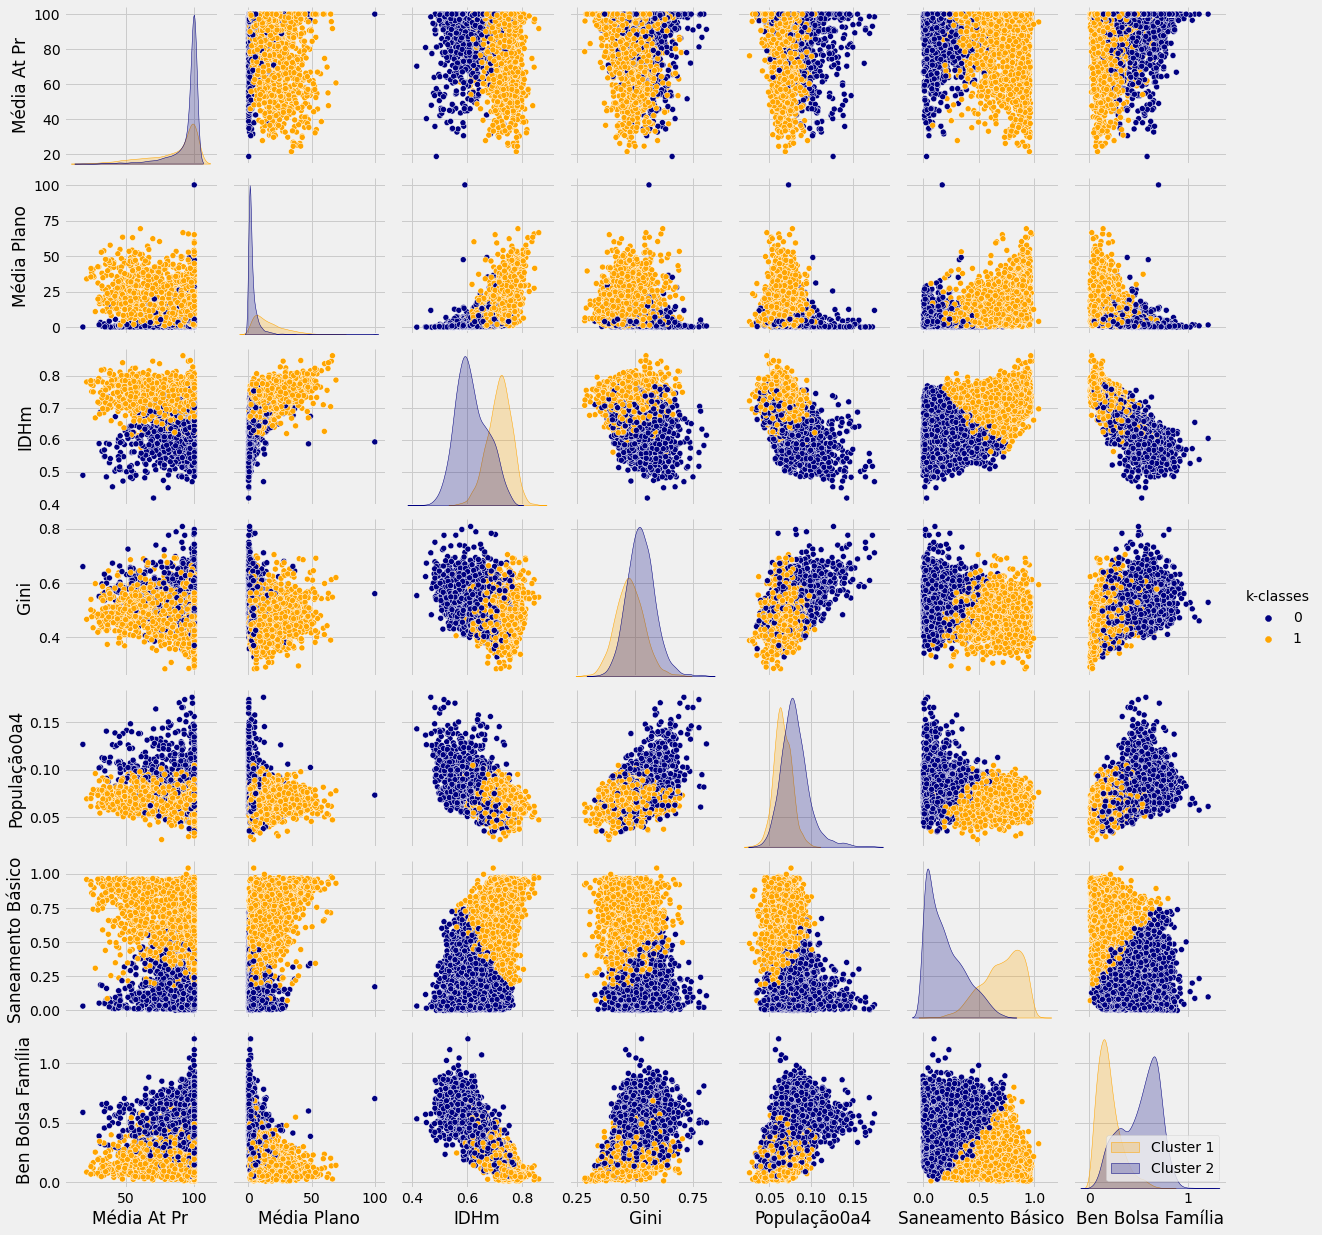

In [10]:
sb.pairplot(dfKmeans,hue="k-classes",palette = ["navy","orange"])
plt.savefig('pairplot.tif', format='tif')
plt.legend(["Cluster 1","Cluster 2"], ncol = 1 , loc = "lower right")
#"grey","deeppink","lawngreen","darkgreen","purple","red","lawngreen"

In [19]:
c0=[]
c1=[]
Lc=[]

#Vendo quanto de cada Região estão em cada cluster
for i in dfMunCl["k-classes"]:
    #print(i)
    if i not in Lc:
        #print(i)
        Lc.append(i)
        if i==0:
            c0.append(dfMunCl.index[dfMunCl['k-classes']==i].tolist())
        elif i==1:
            c1.append(dfMunCl.index[dfMunCl['k-classes']==i].tolist())


print("",len(c0[0]),"\n",len(c1[0]))

t=(len(c0[0])+len(c1[0]))
print("\nTotal:",t)

#Vendo quais são os municípios de cada Cluster
dfMunCl2 = dfMunCl.set_index("Município")

cm0=[]
cm1=[]
Lm=[]
for i in dfMunCl2["k-classes"]:
    #print(i)
    if i not in Lm:
        #print(i)
        Lm.append(i)
        if i==0:
            cm0.append(dfMunCl2.index[dfMunCl2['k-classes']==i].tolist())
        elif i==1:
            cm1.append(dfMunCl2.index[dfMunCl2['k-classes']==i].tolist())

#print("\nMunicípios em cada Cluster")
#print("Cluster 1 \n",cm0)
#print("Cluster 2 \n",cm1)

 3085 
 2098

Total: 5183


In [20]:
clusters =[c0,c1]
h=-1
for k in clusters:
    Nd=0
    No=0
    Co=0
    Sd=0
    Su=0
    for j in k:
        for n in j:
            if n=="Nordeste":
                Nd+=1
            elif n=="Norte":
                No+=1
            elif n=="Centro Oeste":
                Co+=1
            elif n=="Sudeste":
                Sd+=1
            else:
                Su+=1
    Total= Nd+No+Co+Sd+Su
    h+=1
    print('\033[1m',"Cluster", h,'\033[0m')
    print("Nordeste:",Nd)
    print("Norte:",No)
    print("Centro Oeste:",Co)  
    print("Sudeste:",Sd)  
    print("Sul:",Su)
    print("Total:",Total)
    print("\n")


 Cluster 0 
Nordeste: 1613
Norte: 408
Centro Oeste: 354
Sudeste: 317
Sul: 393
Total: 3085


 Cluster 1 
Nordeste: 129
Norte: 19
Centro Oeste: 94
Sudeste: 1215
Sul: 641
Total: 2098




# K-medoids

In [ ]:
#Código da clusterização quando já se sabe a quantidade de clusters
kmedoids = KMedoids(init="k-medoids++", n_clusters=20, max_iter=300)
kmedoids.fit(dfCluster_scaled)

#Mostra a localização dos centros das variáveis de cada cluster
kmedoids.cluster_centers_
#Mostra aonde cada objeto está, em que cluster
kmedoids.labels_
#Mostra a quantidade de interações necessárias para convergir
kmedoids.n_iter_
#Mostra o erro quadrático (sse)
kmedoids.inertia_

12


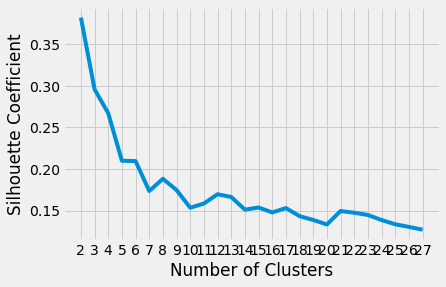

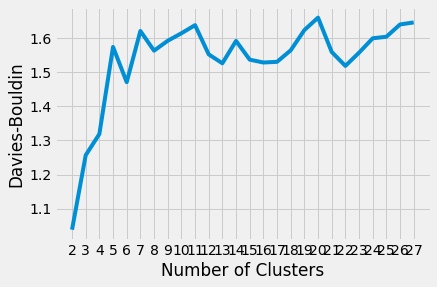

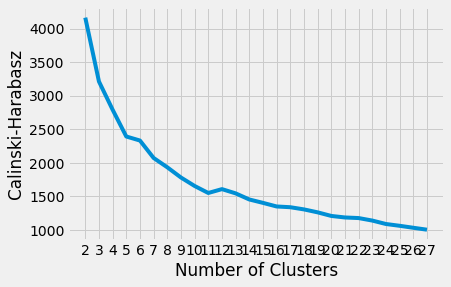

In [21]:
kmedoids_par = {"init": "k-medoids++", "max_iter": 300, "random_state":8}
sse = []
coef_silhueta = []
CH=[]
DB=[]
for k in range(2, 28):
    kmedoids = KMedoids(n_clusters=k, **kmedoids_par)
    kmedoids.fit(dfCluster_scaled)
    sse.append(kmedoids.inertia_)
    score = silhouette_score(dfCluster_scaled, kmedoids.labels_)
    coef_silhueta.append(score)
    DvB=davies_bouldin_score(dfCluster_scaled, kmedoids.labels_)
    DB.append(DvB)
    ch=metrics.calinski_harabasz_score(dfCluster_scaled, kmedoids.labels_)
    CH.append(ch)
    

kl = KneeLocator(range(2, 28), sse, curve="convex", direction="decreasing")
ponto = kl.elbow
print(ponto)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 28), coef_silhueta)
plt.xticks(range(2, 28))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

plt.style.use("fivethirtyeight")
plt.plot(range(2, 28), DB)
plt.xticks(range(2, 28))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin")
plt.show()

plt.style.use("fivethirtyeight")
plt.plot(range(2, 28), CH)
plt.xticks(range(2, 28))
plt.xlabel("Number of Clusters")
plt.ylabel("Calinski-Harabasz")
plt.show()

In [22]:
nCluster=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dicionário = {'SSE': sse,'Coef_Silhouette': coef_silhueta, "Davies-Bouldin":DB,"Calinski-Harabasz":CH, "N_Cluster":nCluster}
dfTab = pd.DataFrame(dicionário)
dfTab=dfTab.set_index("N_Cluster")
print(dfTab)


                   SSE  Coef_Silhouette  Davies-Bouldin  Calinski-Harabasz
N_Cluster                                                                 
2          1689.210874         0.382160        1.038115        4165.088722
3          1523.865448         0.295905        1.256737        3212.897526
4          1406.931699         0.267094        1.318957        2792.237797
5          1339.974871         0.209908        1.574508        2393.124097
6          1258.204831         0.209551        1.471059        2332.665407
7          1224.390360         0.173509        1.621234        2072.935744
8          1188.437923         0.188202        1.563507        1933.988388
9          1165.906848         0.174618        1.592489        1781.524514
10         1146.042367         0.153377        1.614505        1655.384239
11         1128.333565         0.158491        1.638393        1551.038003
12         1092.705159         0.169634        1.552620        1608.452629
13         1074.341411   

In [23]:
kmedoids = KMedoids(init="k-medoids++", n_clusters=2, max_iter=300,random_state=8)
kmedoids.fit(dfCluster_scaled)
clas=kmedoids.labels_

In [24]:
dfMunCl2=dfDados.copy()
dfMunCl2["k-classes"]= clas
#dfMunCl2 = dfMunCl2.set_index("Região")
#print(dfMunCl2)

dfKmedoids=dfDados.copy()
dfKmedoids=dfKmedoids.set_index("CodMuns")
dfKmedoids.drop(["Estado","Tipo_Urb","Média Cob Vac","Média Var CobVac","Média Var At Pr","Média Var Plano","IDHm_renda","pop_area","Média_pop","Média_pop0a4",
                "area_km2","Densidade", "média_familias_bf"], axis=1, inplace=True)
dfKmedoids["k-classes"]= clas
#print(dfKmedoids)

#Criando base de dados para o mapa do QGIS
#dfKmedoidsmapa= dfKmedoids.copy()
#dfKmedoidsmapa.drop(["Média At Pr","Média Plano", "IDHm", "gini","Média_pct_pop0a4","pct_san_adeq",
#                                 "média_pct_ben_bf"], axis=1, inplace=True)
#dfKmedoidsmapa=dfKmedoidsmapa.set_index("Município")
#print(dfKmedoidsmapa)
#NomeExcel = pd.ExcelWriter('ClusterMapa.xlsx')
#dfKmedoidsmapa.to_excel(NomeExcel)
#NomeExcel.save()

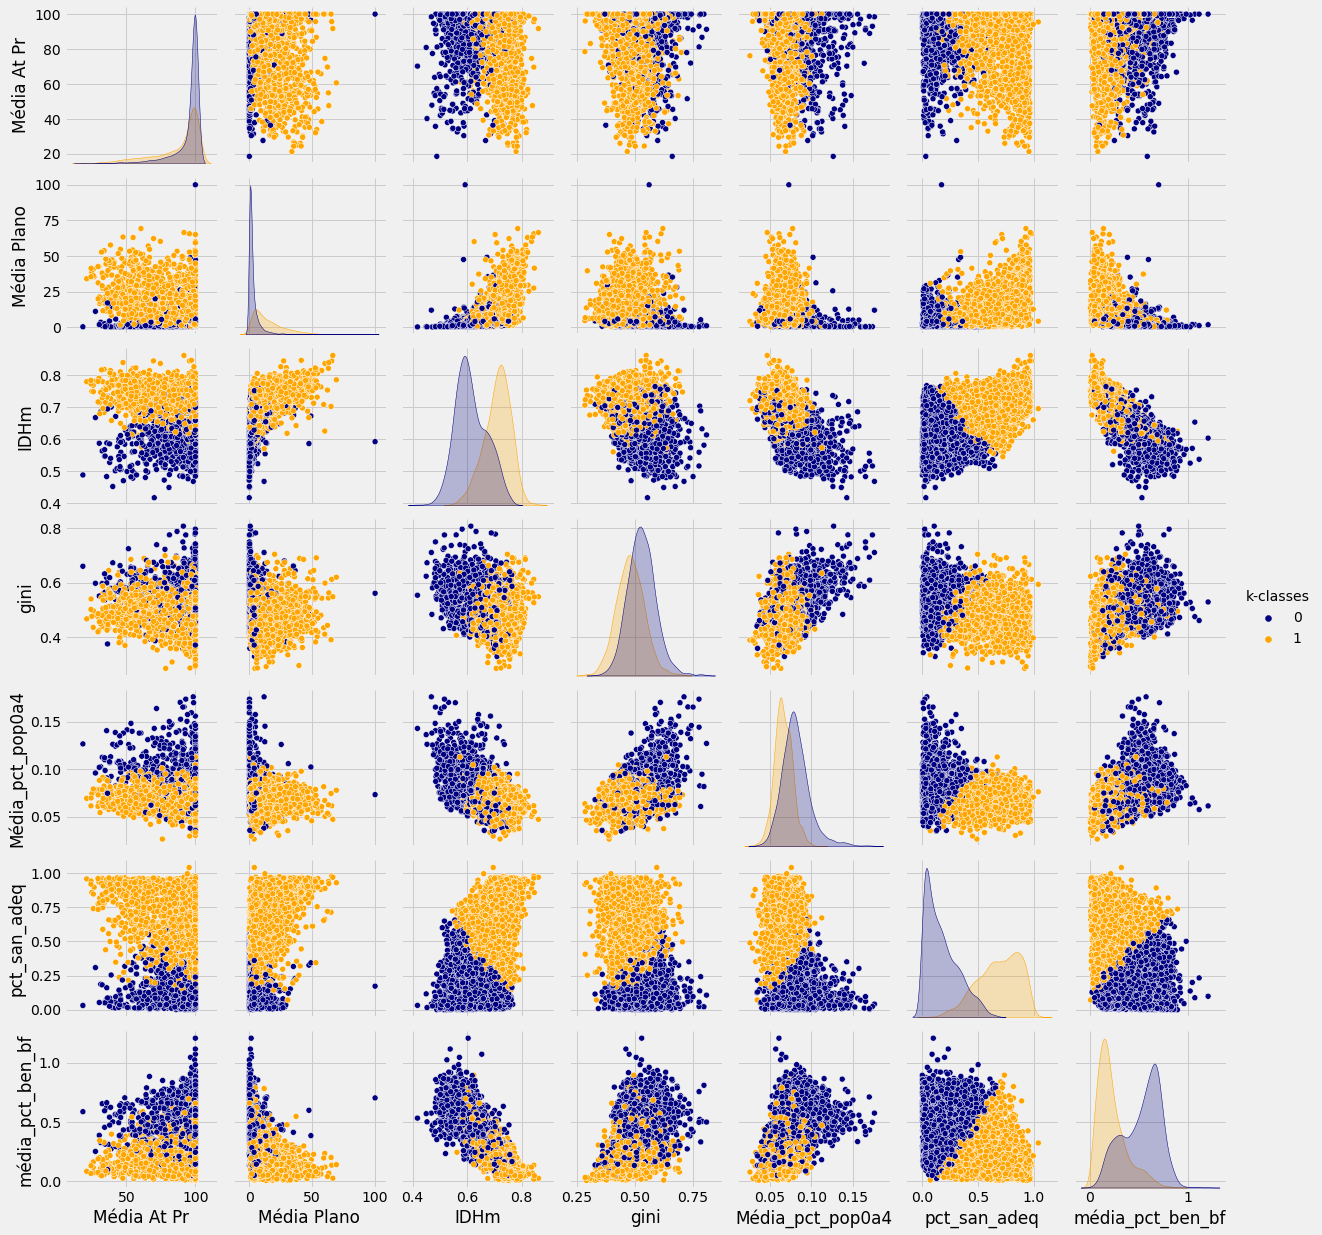

In [25]:
sb.pairplot(dfKmedoids,hue="k-classes",palette = ["navy","orange"])
#,"grey","aqua","deeppink","lawngreen","darkgreen","purple","grey","aqua"

In [26]:
cKd0=[]
cKd1=[]
Lc=[]

for i in dfMunCl2["k-classes"]:
    #print(i)
    if i not in Lc:
        #print(i)
        Lc.append(i)
        if i==0:
            cKd0.append(dfMunCl.index[dfMunCl['k-classes']==i].tolist())
        elif i==1:
            cKd1.append(dfMunCl.index[dfMunCl['k-classes']==i].tolist())
       
    
print("",len(cKd0[0]),"\n",len(cKd1[0]))

t=(len(cKd0[0])+len(cKd1[0]))
print("\nTotal:",t)

#Vendo quais são os municípios de cada Cluster
dfMunCl2 = dfMunCl.set_index("Município")

cmKd0=[]
cmKd1=[]
Lm=[]
for i in dfMunCl2["k-classes"]:
    #print(i)
    if i not in Lm:
        #print(i)
        Lm.append(i)
        if i==0:
            cmKd0.append(dfMunCl2.index[dfMunCl2['k-classes']==i].tolist())
        elif i==1:
            cmKd1.append(dfMunCl2.index[dfMunCl2['k-classes']==i].tolist())
        elif i==2:
            cmKd2.append(dfMunCl2.index[dfMunCl2['k-classes']==i].tolist())
    
            
#print("\n","Municípios em cada Cluster")
#print("Cluster 1 \n",cmKd0)
#print("Cluster 2 \n",cmKd1)

 3085 
 2098

Total: 5183


In [27]:
clusters =[cKd0,cKd1]
h=-1
for k in clusters:
    Nd=0
    No=0
    Co=0
    Sd=0
    Su=0
    for j in k:
        for n in j:
            if n=="Nordeste":
                Nd+=1
            elif n=="Norte":
                No+=1
            elif n=="Centro Oeste":
                Co+=1
            elif n=="Sudeste":
                Sd+=1
            else:
                Su+=1
    Total= Nd+No+Co+Sd+Su
    h+=1
    print('\033[1m',"Cluster", h,'\033[0m')
    print("Nordeste:",Nd)
    print("Norte:",No)
    print("Centro Oeste:",Co)  
    print("Sudeste:",Sd)  
    print("Sul:",Su)
    print("Total:",Total)
    print("\n")

 Cluster 0 
Nordeste: 1613
Norte: 408
Centro Oeste: 354
Sudeste: 317
Sul: 393
Total: 3085


 Cluster 1 
Nordeste: 129
Norte: 19
Centro Oeste: 94
Sudeste: 1215
Sul: 641
Total: 2098




In [28]:
#Descobrindo quais municípios que são os centros
#centros = (kmedoids.cluster_centers_).tolist()
#dfCluster_scaled=dfCluster_scaled.tolist()

#for i in centros:
#    for j in dfCluster_scaled:
#        if i==j:
#            print(dfCluster_scaled.index(i))
            
            
#dfCentros = pd.read_csv("DadosCompletos.csv")
#mun1=dfCentros.loc[3918]
#mun2=dfCentros.loc[1559]
#print("\n",mun1)
#print("\n",mun2)

# Análise clusterização (K-Means com 2 clusters)

In [29]:
clusters =[c0,c1]
h=-1
for k in clusters:
    Nd=0
    No=0
    Co=0
    Sd=0
    Su=0
    for j in k:
        for n in j:
            if n=="Nordeste":
                Nd+=1
            elif n=="Norte":
                No+=1
            elif n=="Centro Oeste":
                Co+=1
            elif n=="Sudeste":
                Sd+=1
            else:
                Su+=1
    Total= Nd+No+Co+Sd+Su
    h+=1
    print('\033[1m',"Cluster", h,'\033[0m')
    print("Nordeste:",Nd)
    print("Norte:",No)
    print("Centro Oeste:",Co)  
    print("Sudeste:",Sd)  
    print("Sul:",Su)
    print("Total:",Total)
    print("\n")

 Cluster 0 
Nordeste: 1613
Norte: 408
Centro Oeste: 354
Sudeste: 317
Sul: 393
Total: 3085


 Cluster 1 
Nordeste: 129
Norte: 19
Centro Oeste: 94
Sudeste: 1215
Sul: 641
Total: 2098




In [38]:
dfDados = pd.read_csv("DadosCompletos.csv")
dfDados.rename(columns = {"Média_pct_pop0a4":'População0a4',"gini":"Gini", "pct_san_adeq":"Saneamento Básico", "média_pct_ben_bf":"Ben Bolsa Família"}, inplace = True)

dfCl1=dfDados
dfCl2=dfDados
dfCls=dfDados

dfCl1["k-classes"]= clas
dfCl2["k-classes"]= clas
dfCls["k-classes"]= clas

dfCl1=dfCl1.set_index("k-classes")
dfCl2=dfCl2.set_index("k-classes")
dfCls=dfCls.set_index("k-classes")

dfCl1.drop([1],inplace=True)
dfCl2.drop([0],inplace=True)



#### Plot dispersão com todos os clusters

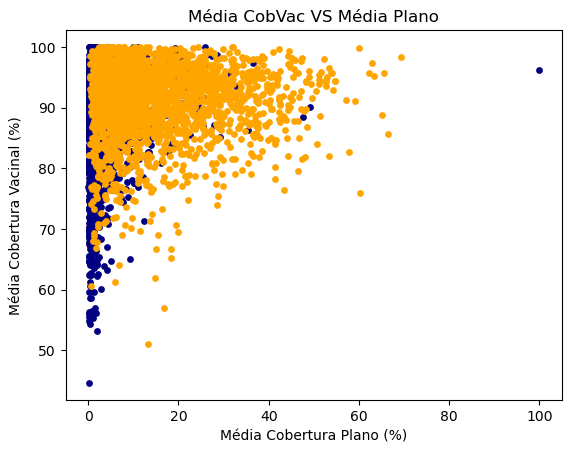

<Figure size 640x480 with 0 Axes>

In [39]:
#Plano de Saúde
plt.style.use("default")
PltCl=plt.scatter(dfCl1['Média Plano'], dfCl1['Média Cob Vac'], s=15,c="navy")
PltCl=plt.scatter(dfCl2['Média Plano'], dfCl2['Média Cob Vac'], s=15,c="orange")
plt.title("Média CobVac VS Média Plano")
plt.xlabel("Média Cobertura Plano (%)")
plt.ylabel("Média Cobertura Vacinal (%)")
#plt.legend(["Cluster 1","Cluster 2"], ncol = 1 , loc = "lower right")
plt.savefig('Cluster - Média CobVac VS Média Plano.jpg', format='jpg')
plt.show()
plt.clf()

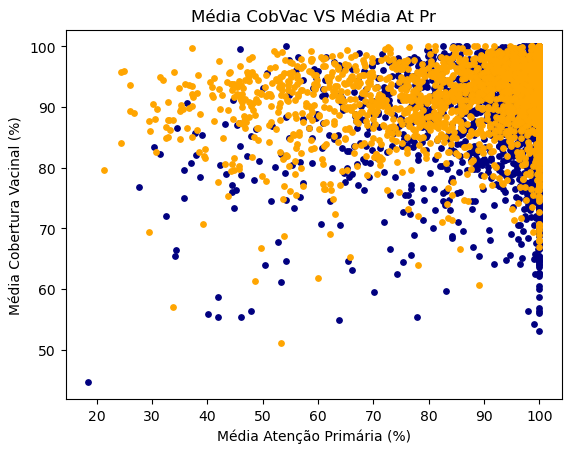

<Figure size 640x480 with 0 Axes>

In [40]:
#Média Atenção Primária
PltCl=plt.scatter(dfCl1['Média At Pr'], dfCl1['Média Cob Vac'], s=15,c="navy")
PltCl=plt.scatter(dfCl2['Média At Pr'], dfCl2['Média Cob Vac'], s=15,c="orange")
plt.title("Média CobVac VS Média At Pr")
plt.xlabel("Média Atenção Primária (%)")
plt.ylabel("Média Cobertura Vacinal (%)")
#plt.legend(["Cluster 1","Cluster 2"], ncol = 3 , loc = "lower right")
plt.savefig('Cluster - Média CobVac VS Média Atenção Primária.jpg', format='jpg')
plt.show()
plt.clf()

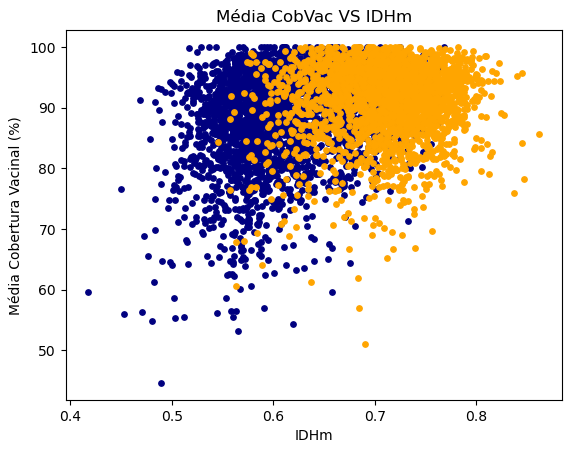

<Figure size 640x480 with 0 Axes>

In [41]:
#IDHm
PltCl=plt.scatter(dfCl1['IDHm'], dfCl1['Média Cob Vac'], s=15,c="navy")
PltCl=plt.scatter(dfCl2['IDHm'], dfCl2['Média Cob Vac'],s=15, c="orange")
plt.title("Média CobVac VS IDHm")
plt.xlabel("IDHm")
plt.ylabel("Média Cobertura Vacinal (%)")
#plt.legend(["Cluster 1","Cluster 2"], ncol = 1 , loc = "lower right")
plt.savefig('Cluster - Média CobVac VS IDHm.jpg', format='jpg')
plt.show()
plt.clf()

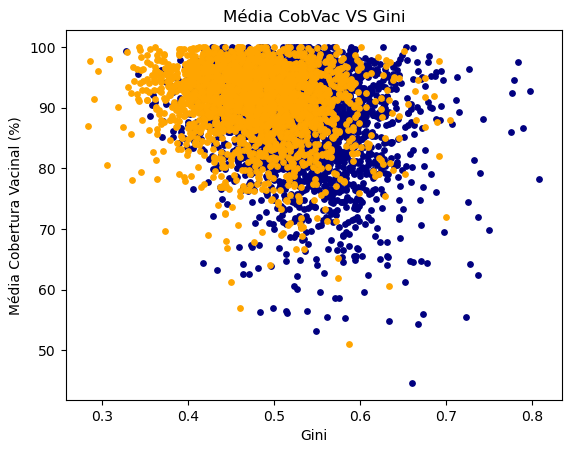

<Figure size 640x480 with 0 Axes>

In [43]:
#Gini
PltCl=plt.scatter(dfCl1['Gini'], dfCl1['Média Cob Vac'],s=15, c="navy")
PltCl=plt.scatter(dfCl2['Gini'], dfCl2['Média Cob Vac'],s=15, c="orange")
plt.title("Média CobVac VS Gini")
plt.xlabel("Gini")
plt.ylabel("Média Cobertura Vacinal (%)")
#plt.legend(["Cluster 1","Cluster 2"], ncol = 1 , loc = "lower left")
plt.savefig('Cluster - Média CobVac VS Gini.jpg', format='jpg')
plt.show()
plt.clf()

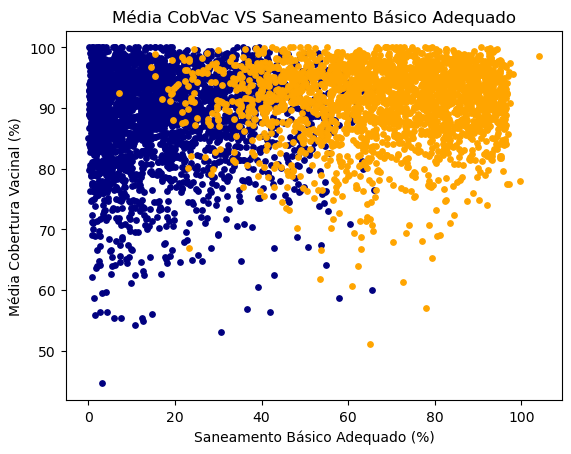

<Figure size 640x480 with 0 Axes>

In [44]:
#Saneamento Básico
PltCl=plt.scatter(dfCl1['Saneamento Básico']*100, dfCl1['Média Cob Vac'], s=15,c="navy")
PltCl=plt.scatter(dfCl2['Saneamento Básico']*100, dfCl2['Média Cob Vac'],s=15, c="orange")
plt.title("Média CobVac VS Saneamento Básico Adequado")
plt.xlabel("Saneamento Básico Adequado (%)")
plt.ylabel("Média Cobertura Vacinal (%)")
#plt.legend(["Cluster 1","Cluster 2"], ncol = 1 , loc = "lower right")
plt.savefig('Cluster - Média CobVac VS Saneamento Básico.jpg', format='jpg')
plt.show()
plt.clf()

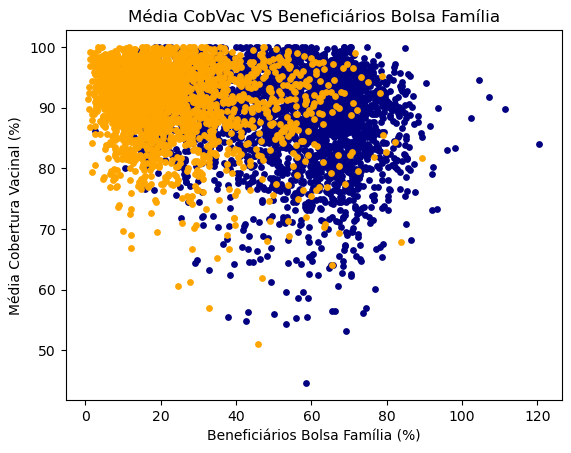

<Figure size 640x480 with 0 Axes>

In [45]:
#Beneficiários Bolsa Família
PltCl=plt.scatter(dfCl1['Ben Bolsa Família']*100, dfCl1['Média Cob Vac'],s=15, c="navy")
PltCl=plt.scatter(dfCl2['Ben Bolsa Família']*100, dfCl2['Média Cob Vac'], s=15,c="orange")
plt.title("Média CobVac VS Beneficiários Bolsa Família")
plt.xlabel("Beneficiários Bolsa Família (%)")
plt.ylabel("Média Cobertura Vacinal (%)")
#plt.legend(["Cluster 1","Cluster 2"], ncol = 1 , loc = "lower right")
plt.savefig('Cluster - Média CobVac VS Bolsa Família.png', format='png')
plt.show()
plt.clf()

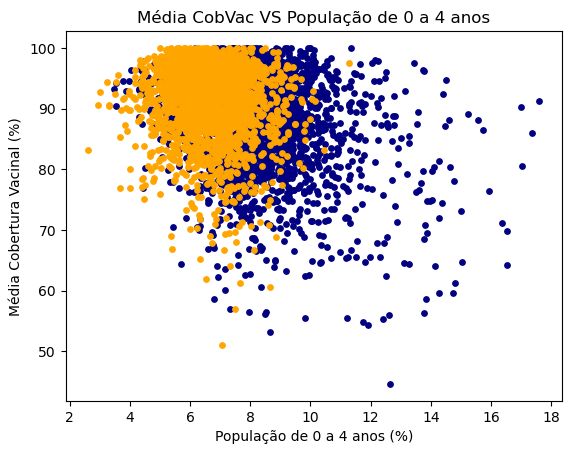

<Figure size 640x480 with 0 Axes>

In [46]:
#População de 0 a 4 anos
PltCl=plt.scatter(dfCl1['População0a4']*100, dfCl1['Média Cob Vac'], s=15,c="navy")
PltCl=plt.scatter(dfCl2['População0a4']*100, dfCl2['Média Cob Vac'], s=15,c="orange")
plt.title("Média CobVac VS População de 0 a 4 anos")
plt.xlabel("População de 0 a 4 anos (%)")
plt.ylabel("Média Cobertura Vacinal (%)")
#plt.legend(["Cluster 1","Cluster 2"], ncol = 1 , loc = "lower left")
plt.savefig('Cluster - Média CobVac VS População de 0 a 4 anos.jpg', format='jpg')
plt.show()
plt.clf()

## Tabela Clusters

In [27]:
dfDados = pd.read_csv("DadosCompletos.csv")

dfCl1=dfDados
dfCl2=dfDados
dfCls=dfDados

dfCl1["k-classes"]= clas
dfCl2["k-classes"]= clas
dfCls["k-classes"]= clas

dfCl1=dfCl1.set_index("k-classes")
dfCl2=dfCl2.set_index("k-classes")
dfCls=dfCls.set_index("k-classes")

dfCl1.drop([1],inplace=True)
dfCl2.drop([0],inplace=True)

### Analisando Cluster 1 

In [28]:
#print(dfCl1)

In [29]:
dfCl1=dfCl1.sort_values(by=['Média Cob Vac'])
q1 = dfCl1["Média Cob Vac"].quantile(.25)
q3 = dfCl1["Média Cob Vac"].quantile(.75)
mediana = dfCl1["Média Cob Vac"].median()
print("Média Cob Vac")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)

dfCl1=dfCl1.sort_values(by=['Média At Pr'])
q1 = dfCl1["Média At Pr"].quantile(.25)
q3 = dfCl1["Média At Pr"].quantile(.75)
mediana = dfCl1["Média At Pr"].median()
print("\nMédia At Pr")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl1=dfCl1.sort_values(by=['Média Plano'])
q1 = dfCl1["Média Plano"].quantile(.25)
q3 = dfCl1["Média Plano"].quantile(.75)
mediana = dfCl1["Média Plano"].median()
print("\nMédia Plano")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl1=dfCl1.sort_values(by=['IDHm'])
q1 = dfCl1["IDHm"].quantile(.25)
q3 = dfCl1["IDHm"].quantile(.75)
mediana = dfCl1["IDHm"].median()
print("\nIDHm")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl1=dfCl1.sort_values(by=['gini'])
q1 = dfCl1["gini"].quantile(.25)
q3 = dfCl1["gini"].quantile(.75)
mediana = dfCl1["gini"].median()
print("\ngini")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl1=dfCl1.sort_values(by=['Média_pct_pop0a4'])
q1 = dfCl1["Média_pct_pop0a4"].quantile(.25)
q3 = dfCl1["Média_pct_pop0a4"].quantile(.75)
mediana = dfCl1["Média_pct_pop0a4"].median()
print("\nMédia_pct_pop0a4")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl1=dfCl1.sort_values(by=['pct_san_adeq'])
q1 = dfCl1["pct_san_adeq"].quantile(.25)
q3 = dfCl1["pct_san_adeq"].quantile(.75)
mediana = dfCl1["pct_san_adeq"].median()
print("\npct_san_adeq")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl1=dfCl1.sort_values(by=['média_pct_ben_bf'])
q1 = dfCl1["média_pct_ben_bf"].quantile(.25)
q3 = dfCl1["média_pct_ben_bf"].quantile(.75)
mediana = dfCl1["média_pct_ben_bf"].median()
print("\nmédia_pct_ben_bf")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)

Média Cob Vac
Mediana = 90.16689305
Q1 = 84.4489986
Q3 = 94.52693310000001

Média At Pr
Mediana = 100.0
Q1 = 94.986363625
Q3 = 100.0

Média Plano
Mediana = 1.4243025
Q1 = 0.66053725
Q3 = 3.310555325

IDHm
Mediana = 0.606
Q1 = 0.573
Q3 = 0.656

gini
Mediana = 0.5259
Q1 = 0.4876
Q3 = 0.5642

Média_pct_pop0a4
Mediana = 0.0796697
Q1 = 0.070447
Q3 = 0.08961035

pct_san_adeq
Mediana = 0.13805695
Q1 = 0.050456825
Q3 = 0.2670909

média_pct_ben_bf
Mediana = 0.56911205
Q1 = 0.381535325
Q3 = 0.672699225


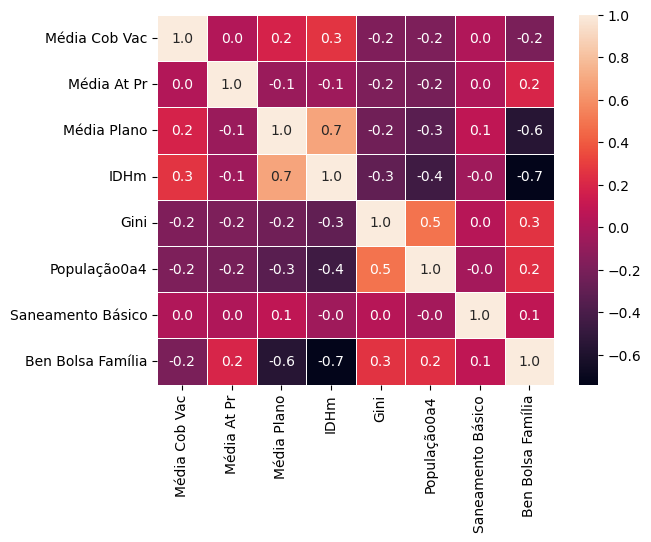

In [41]:
#dfCl1.drop(["Região", "Município","CodMuns","Estado","Média Var CobVac","Média Var At Pr","Média Var Plano","IDHm_renda",
#            "pop_area","Média_pop","Média_pop0a4","area_km2","Tipo_Urb","Densidade", "média_familias_bf"], axis=1, inplace=True)
#print(dfCl1)
dfCl1.rename(columns = {"Média_pct_pop0a4":'População0a4',"gini":"Gini", "pct_san_adeq":"Saneamento Básico", "média_pct_ben_bf":"Ben Bolsa Família"}, inplace = True)

correlationCl1 = dfCl1.corr("spearman")

plot = sb.heatmap(correlationCl1, annot = True, fmt=".1f", linewidths=.6)
plot
plt.savefig('Matriz CLuster1 Spearman.jpg', format='jpg', bbox_inches ="tight")

### Analisando Cluster 2

In [31]:
dfCl2=dfCl2.sort_values(by=['Média Cob Vac'])
q1 = dfCl2["Média Cob Vac"].quantile(.25)
q3 = dfCl2["Média Cob Vac"].quantile(.75)
mediana = dfCl2["Média Cob Vac"].median()
print("Média Cob Vac")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)

dfCl2=dfCl2.sort_values(by=['Média At Pr'])
q1 = dfCl2["Média At Pr"].quantile(.25)
q3 = dfCl2["Média At Pr"].quantile(.75)
mediana = dfCl2["Média At Pr"].median()
print("\nMédia At Pr")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl2=dfCl2.sort_values(by=['Média Plano'])
q1 = dfCl2["Média Plano"].quantile(.25)
q3 = dfCl2["Média Plano"].quantile(.75)
mediana = dfCl2["Média Plano"].median()
print("\nMédia Plano")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl2=dfCl2.sort_values(by=['IDHm'])
q1 = dfCl2["IDHm"].quantile(.25)
q3 = dfCl2["IDHm"].quantile(.75)
mediana = dfCl2["IDHm"].median()
print("\nIDHm")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl2=dfCl2.sort_values(by=['gini'])
q1 = dfCl2["gini"].quantile(.25)
q3 = dfCl2["gini"].quantile(.75)
mediana = dfCl2["gini"].median()
print("\ngini")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl2=dfCl2.sort_values(by=['Média_pct_pop0a4'])
q1 = dfCl2["Média_pct_pop0a4"].quantile(.25)
q3 = dfCl2["Média_pct_pop0a4"].quantile(.75)
mediana = dfCl2["Média_pct_pop0a4"].median()
print("\nMédia_pct_pop0a4")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl2=dfCl2.sort_values(by=['pct_san_adeq'])
q1 = dfCl2["pct_san_adeq"].quantile(.25)
q3 = dfCl2["pct_san_adeq"].quantile(.75)
mediana = dfCl2["pct_san_adeq"].median()
print("\npct_san_adeq")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)


dfCl2=dfCl2.sort_values(by=['média_pct_ben_bf'])
q1 = dfCl2["média_pct_ben_bf"].quantile(.25)
q3 = dfCl2["média_pct_ben_bf"].quantile(.75)
mediana = dfCl2["média_pct_ben_bf"].median()
print("\nmédia_pct_ben_bf")
print("Mediana =",mediana)
print("Q1 =",q1)
print("Q3 =",q3)

Média Cob Vac
Mediana = 92.2717464
Q1 = 87.99108315
Q3 = 95.5251683

Média At Pr
Mediana = 95.7
Q1 = 79.54590909999999
Q3 = 100.0

Média Plano
Mediana = 11.3085437
Q1 = 5.54430335
Q3 = 21.03365595

IDHm
Mediana = 0.716
Q1 = 0.68
Q3 = 0.745

gini
Mediana = 0.4775
Q1 = 0.4384
Q3 = 0.5181

Média_pct_pop0a4
Mediana = 0.0656449
Q1 = 0.05901895
Q3 = 0.0735217

pct_san_adeq
Mediana = 0.7057021
Q1 = 0.55783385
Q3 = 0.83750935

média_pct_ben_bf
Mediana = 0.1861278
Q1 = 0.11931405
Q3 = 0.28857615000000003


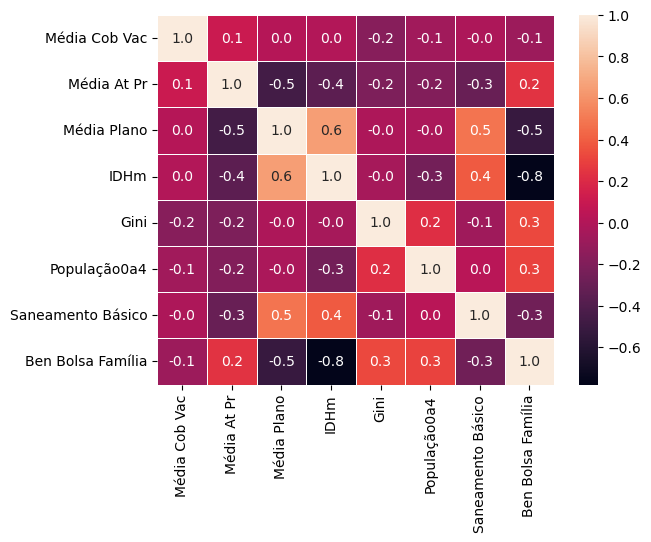

In [42]:
#dfCl2.drop(["Região", "Município","CodMuns","Estado","Média Var CobVac","Média Var At Pr","Média Var Plano","IDHm_renda",
#            "pop_area","Média_pop","Média_pop0a4","area_km2","Tipo_Urb","Densidade", "média_familias_bf"], axis=1, inplace=True)
#print(dfCl2)
dfCl2.rename(columns = {"Média_pct_pop0a4":'População0a4',"gini":"Gini", "pct_san_adeq":"Saneamento Básico", "média_pct_ben_bf":"Ben Bolsa Família"}, inplace = True)

correlationCl2 = dfCl2.corr("spearman")
plot = sb.heatmap(correlationCl2, annot = True, fmt=".1f", linewidths=.6)
plot
plt.savefig('Matriz CLuster2 Spearman.jpg', format='jpg', bbox_inches ="tight")

# Gráfico de linhas - Variação temporal da cobertura de vacinação nos clusters 

In [33]:
dfCobCl = pd.read_csv("CobVacCluster.csv",index_col=2)
dfCobCl["k-classes"]= clas

dfCobCl1=dfCobCl.set_index("k-classes")
dfCobCl2=dfCobCl.set_index("k-classes")

dfCobCl1.drop([1],inplace=True)
dfCobCl2.drop([0],inplace=True)

#print(dfCobCl1)

### Fazendo médias da Cob Vac por ano - Cluster 1

In [34]:
Cl1M10=dfCobCl1["2010"].mean()
Cl1M11=dfCobCl1["2011"].mean()
Cl1M12=dfCobCl1["2012"].mean()
Cl1M13=dfCobCl1["2013"].mean()
Cl1M14=dfCobCl1["2014"].mean()
Cl1M15=dfCobCl1["2015"].mean()
Cl1M16=dfCobCl1["2016"].mean()
Cl1M17=dfCobCl1["2017"].mean()
Cl1M18=dfCobCl1["2018"].mean()
Cl1M19=dfCobCl1["2019"].mean()
Cl1M20=dfCobCl1["2020"].mean()

print("Média CobVac")
print("Ano de 2010:", Cl1M10)
print("Ano de 2011:", Cl1M11)
print("Ano de 2012:", Cl1M12)
print("Ano de 2013:", Cl1M13)
print("Ano de 2014:", Cl1M14)
print("Ano de 2015:", Cl1M15)
print("Ano de 2016:", Cl1M16)
print("Ano de 2017:", Cl1M17)
print("Ano de 2018:", Cl1M18)
print("Ano de 2019:", Cl1M19)
print("Ano de 2020:", Cl1M20)

Média CobVac
Ano de 2010: 94.9124687973352
Ano de 2011: 94.29537269635321
Ano de 2012: 90.67226429523137
Ano de 2013: 93.17230298036455
Ano de 2014: 88.9733163008415
Ano de 2015: 89.14614107643752
Ano de 2016: 80.92924231416546
Ano de 2017: 85.60132106591865
Ano de 2018: 89.69293553997197
Ano de 2019: 86.89619176718082
Ano de 2020: 80.04425820126221


### Fazendo médias da Cob Vac por ano - Cluster 2

In [35]:
Cl2M10=dfCobCl2["2010"].mean()
Cl2M11=dfCobCl2["2011"].mean()
Cl2M12=dfCobCl2["2012"].mean()
Cl2M13=dfCobCl2["2013"].mean()
Cl2M14=dfCobCl2["2014"].mean()
Cl2M15=dfCobCl2["2015"].mean()
Cl2M16=dfCobCl2["2016"].mean()
Cl2M17=dfCobCl2["2017"].mean()
Cl2M18=dfCobCl2["2018"].mean()
Cl2M19=dfCobCl2["2019"].mean()
Cl2M20=dfCobCl2["2020"].mean()

print("Média CobVac")
print("Ano de 2010:", Cl2M10)
print("Ano de 2011:", Cl2M11)
print("Ano de 2012:", Cl2M12)
print("Ano de 2013:", Cl2M13)
print("Ano de 2014:", Cl2M14)
print("Ano de 2015:", Cl2M15)
print("Ano de 2016:", Cl2M16)
print("Ano de 2017:", Cl2M17)
print("Ano de 2018:", Cl2M18)
print("Ano de 2019:", Cl2M19)
print("Ano de 2020:", Cl2M20)

Média CobVac
Ano de 2010: 95.55139703560702
Ano de 2011: 95.78699101673105
Ano de 2012: 92.96984518232522
Ano de 2013: 94.92187760188756
Ano de 2014: 93.14300420849416
Ano de 2015: 92.79987818532824
Ano de 2016: 85.35197290862307
Ano de 2017: 88.59343932646934
Ano de 2018: 91.17874114543103
Ano de 2019: 87.54026593307589
Ano de 2020: 84.91138571428576


### Fazendo o Gráfico

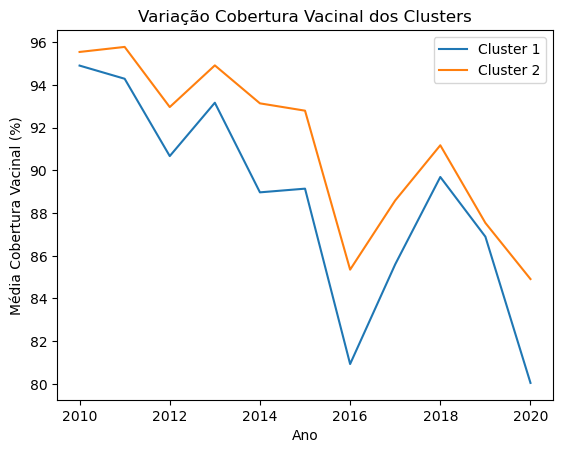

In [36]:
x = np.array([2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
y1 = np.array([Cl1M10,Cl1M11,Cl1M12,Cl1M13,Cl1M14,Cl1M15,Cl1M16,Cl1M17,Cl1M18,Cl1M19,Cl1M20])
y2 = np.array([Cl2M10,Cl2M11,Cl2M12,Cl2M13,Cl2M14,Cl2M15,Cl2M16,Cl2M17,Cl2M18,Cl2M19,Cl2M20])

plt.style.use("default")
plt.plot(x, y1, label = 'Cluster 1')
plt.plot(x, y2, label = 'Cluster 2')
plt.xlabel("Ano")  
plt.ylabel("Média Cobertura Vacinal (%)")  
plt.title("Variação Cobertura Vacinal dos Clusters")
plt.legend()
plt.savefig('CobVac dos Clusters.jpg', format='jpg')
plt.show() 

### Rascunho / Outros Cods

In [ ]:
#Modo de fazer Coeficiente da silhueta

coef_silhueta = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, **kmeans_par)
    kmeans.fit(dfCluster_scaled)
    score = silhouette_score(dfCluster_scaled, kmeans.labels_)
    coef_silhueta.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 25), coef_silhueta)
plt.xticks(range(2, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()